In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Đọc dữ liệu
df = pd.read_csv('vietnam_housing_dataset.csv')
print("Original data shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Original data shape: (30229, 12)

First 5 rows:


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90


In [4]:
# Kiểm tra missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64


In [5]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

In [7]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           30229 non-null  float64
 3   Access Road        30229 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             30229 non-null  float64
 7   Bedrooms           30229 non-null  float64
 8   Bathrooms          30229 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,4.5,6.0,NaN,NaN,4.0,3.0,3.0,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,4.5,6.0,NaN,NaN,5.0,3.0,3.0,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,3.0,3.0,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,4.5,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,4.5,6.0,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...
30224,"Đường Lê Quang Định, Phường 1, Gò Vấp, Hồ Chí ...",67.0,4.1,16.0,NaN,NaN,1.0,3.0,2.0,Have certificate,NaN,4.60
30225,"Đường Ngô Gia Tự, Phường Đức Giang, Long Biên,...",30.0,4.5,6.0,NaN,NaN,5.0,3.0,3.0,Have certificate,NaN,4.70
30226,"Đường Gò Dưa, Phường Tam Bình, Thủ Đức, Hồ Chí...",69.4,4.0,15.0,Đông - Bắc,Đông - Bắc,3.0,3.0,3.0,Have certificate,Basic,7.50
30227,"Đường Quang Trung, Phường 11, Gò Vấp, Hồ Chí Minh",96.0,4.5,8.0,NaN,NaN,4.0,3.0,3.0,NaN,NaN,9.50


In [8]:
# Xử lý missing values cho categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    mode_values = df[col].mode()
    if not mode_values.empty:
        df[col] = df[col].fillna(mode_values[0])
    else:
        df[col] = df[col].fillna('Unknown')

In [10]:
print("\nAfter handling missing values:")
print(df.isnull().sum())


After handling missing values:
Address              0
Area                 0
Frontage             0
Access Road          0
House direction      0
Balcony direction    0
Floors               0
Bedrooms             0
Bathrooms            0
Legal status         0
Furniture state      0
Price                0
dtype: int64


In [11]:
# Feature Engineering
def create_features(df):
    """Tạo thêm features mới từ dữ liệu có sẵn"""
    df_new = df.copy()

    # Tạo feature về tỷ lệ diện tích (nếu có cột Area)
    if 'Area' in df_new.columns and 'Bedrooms' in df_new.columns:
        df_new['Area_per_Bedroom'] = df_new['Area'] / (df_new['Bedrooms'] + 1)

    # Tạo feature về độ tuổi nhà (nếu có cột Year_Built)
    if 'Year_Built' in df_new.columns:
        df_new['House_Age'] = 2024 - df_new['Year_Built']

    # Tạo feature về tổng số phòng (nếu có)
    if 'Bedrooms' in df_new.columns and 'Bathrooms' in df_new.columns:
        df_new['Total_Rooms'] = df_new['Bedrooms'] + df_new['Bathrooms']

    return df_new

df = create_features(df)

In [20]:
# Xử lý outliers sử dụng IQR method
def remove_outliers_iqr(df, column):
    """Loại bỏ outliers sử dụng phương pháp IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [21]:
# Xử lý outliers cho Price
print(f"Before outlier removal: {len(df)} rows")
df = remove_outliers_iqr(df, 'Price')
print(f"After outlier removal: {len(df)} rows")

Before outlier removal: 30229 rows
After outlier removal: 30229 rows


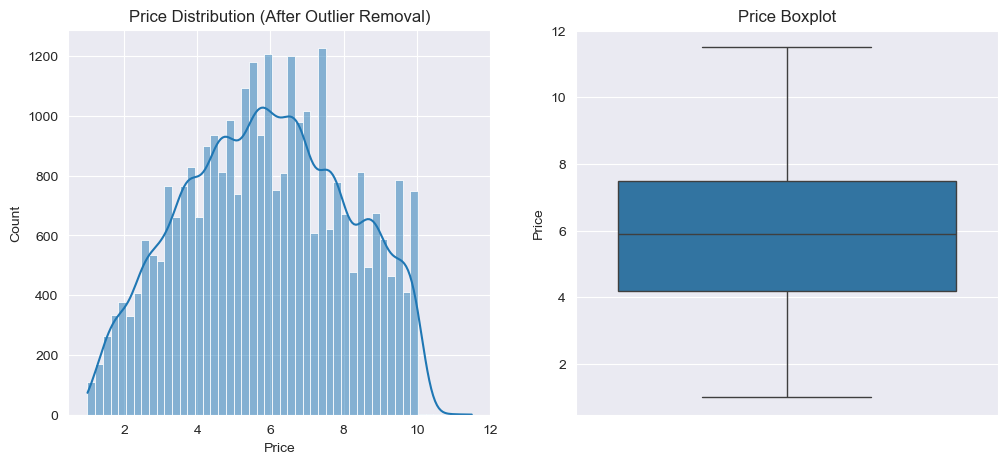

In [34]:
# Visualize price distribution after outlier removal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution (After Outlier Removal)')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Price Boxplot')
plt.show()


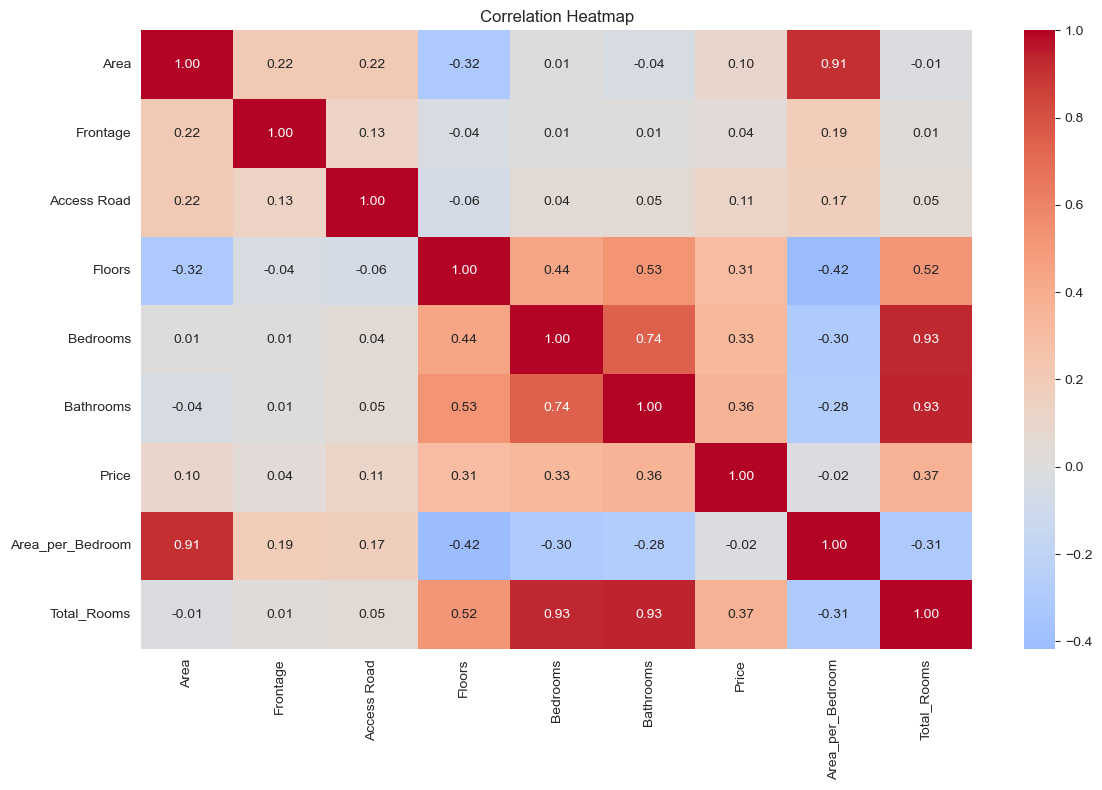

In [35]:
# Correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [36]:
# Chuẩn bị dữ liệu cho training
# Loại bỏ columns không cần thiết
columns_to_drop = ['Address']  # Thêm các cột khác nếu cần
if 'Address' in df.columns:
    X = df.drop(columns=['Price'] + columns_to_drop)
else:
    X = df.drop(columns=['Price'])

In [37]:
# Xử lý categorical variables
X = pd.get_dummies(X, drop_first=True)
y = df['Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (30229, 24)
Target shape: (30229,)


In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

In [39]:
# Feature scaling
scaler = RobustScaler()  # RobustScaler tốt hơn cho dữ liệu có outliers
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Multiple models comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    if name == 'Random Forest':
        # Random Forest không cần scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Linear models cần scaling
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Tính metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    if name == 'Random Forest':
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std()
    }

In [41]:
# Hiển thị kết quả
print("\n" + "="*80)
print("MODEL COMPARISON RESULTS")
print("="*80)

results_df = pd.DataFrame(results).T
print(results_df.round(4))


MODEL COMPARISON RESULTS
                      MSE    RMSE     MAE      R2  CV_R2_mean  CV_R2_std
Linear Regression  3.8954  1.9737  1.6117  0.2011      0.2068     0.0058
Ridge Regression   3.8953  1.9737  1.6117  0.2011      0.2068     0.0058
Lasso Regression   4.8454  2.2012  1.8379  0.0063      0.0078     0.0019
Random Forest      3.5372  1.8808  1.4616  0.2746      0.2908     0.0111


In [42]:
# Tìm model tốt nhất
best_model_name = results_df['R2'].idxmax()
print(f"\nBest Model: {best_model_name}")
print(f"R2 Score: {results_df.loc[best_model_name, 'R2']:.4f}")


Best Model: Random Forest
R2 Score: 0.2746


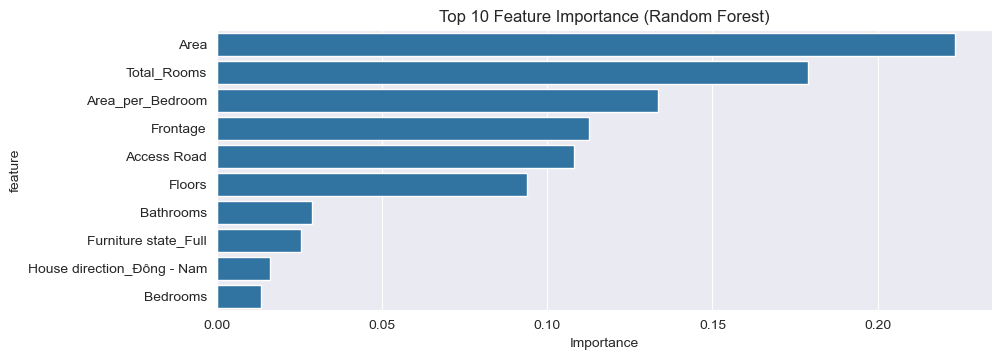

In [43]:
# Feature importance (cho Random Forest)
if best_model_name == 'Random Forest':
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    plt.subplot(2, 1, 1)
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.xlabel('Importance')

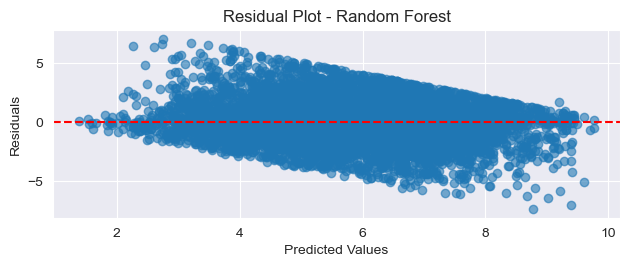

In [44]:
# Residual plot cho model tốt nhất
best_model = models[best_model_name]
if best_model_name == 'Random Forest':
    y_pred_best = best_model.predict(X_test)
else:
    y_pred_best = best_model.predict(X_test_scaled)

plt.subplot(2, 1, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')
plt.tight_layout()
plt.show()

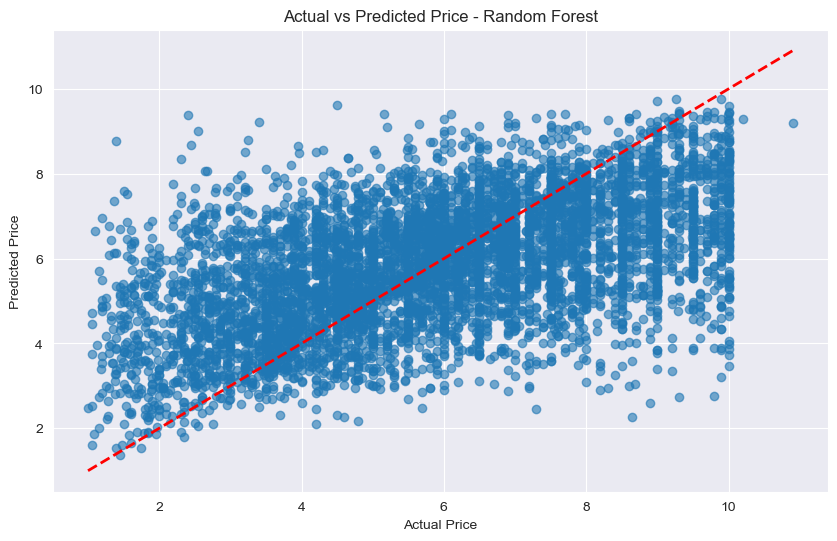

In [45]:
# Prediction vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Price - {best_model_name}')
plt.show()

In [46]:
print("\n" + "="*80)
print("RECOMMENDATIONS FOR IMPROVEMENT:")
print("="*80)
print("1. Collect more data if possible")
print("2. Try advanced feature engineering (polynomial features, interactions)")
print("3. Use ensemble methods (XGBoost, LightGBM)")
print("4. Hyperparameter tuning with GridSearchCV or RandomizedSearchCV")
print("5. Consider location-based features (distance to city center, schools, etc.)")
print("6. Add external data (economic indicators, neighborhood data)")


RECOMMENDATIONS FOR IMPROVEMENT:
1. Collect more data if possible
2. Try advanced feature engineering (polynomial features, interactions)
3. Use ensemble methods (XGBoost, LightGBM)
4. Hyperparameter tuning with GridSearchCV or RandomizedSearchCV
5. Consider location-based features (distance to city center, schools, etc.)
6. Add external data (economic indicators, neighborhood data)


In [47]:
import pickle
from datetime import datetime

# Chọn model tốt nhất và train lại trên toàn bộ dữ liệu training
print(f"Training final model: {best_model_name}")

# Lấy model tốt nhất
final_model = models[best_model_name]

# Train trên toàn bộ training data
if best_model_name == 'Random Forest':
    final_model.fit(X_train, y_train)
    model_to_save = final_model
    scaler_to_save = None
else:
    final_model.fit(X_train_scaled, y_train)
    model_to_save = final_model
    scaler_to_save = scaler

# Lưu model
model_filename = f'vietnam_housing_price_model_{best_model_name.lower().replace(" ", "_")}.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model_to_save, file)

print(f"Model saved as: {model_filename}")

# Lưu scaler (nếu có)
if scaler_to_save is not None:
    scaler_filename = 'scaler.pkl'
    with open(scaler_filename, 'wb') as file:
        pickle.dump(scaler_to_save, file)
    print(f"Scaler saved as: {scaler_filename}")

# Lưu feature names để sử dụng sau này
feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

print("Feature names saved as: feature_names.pkl")

# Lưu model metadata
model_info = {
    'model_name': best_model_name,
    'model_performance': results[best_model_name],
    'feature_names': feature_names,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'data_shape': X.shape,
    'uses_scaler': scaler_to_save is not None
}

with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)

print("Model info saved as: model_info.pkl")
print("\nModel training and saving completed!")

Training final model: Random Forest
Model saved as: vietnam_housing_price_model_random_forest.pkl
Feature names saved as: feature_names.pkl
Model info saved as: model_info.pkl

Model training and saving completed!
